###### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv("E:\MachineHack Hackathon/train.csv")

In [4]:
pd.set_option('display.max_columns',len(train))

In [5]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
InvoiceNo      284780 non-null int64
StockCode      284780 non-null int64
Description    284780 non-null int64
Quantity       284780 non-null int64
InvoiceDate    284780 non-null object
UnitPrice      284780 non-null float64
CustomerID     284780 non-null float64
Country        284780 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


###### Checking For Null Values

In [7]:
train.isnull().mean()

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

### Exploratory Data Analysis

In [8]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [9]:
train['StockCode'].nunique()

3619

###### Top 10 Most Popular Stocks

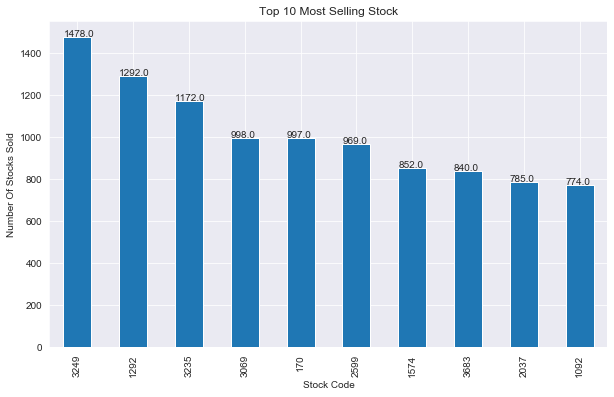

In [10]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Top 10 Most Selling Stock")
plt.xlabel("Stock Code")
plt.ylabel("Number Of Stocks Sold")
ax = train['StockCode'].value_counts()[:10].plot("bar")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

###### Top 10 Most Sold Stocks

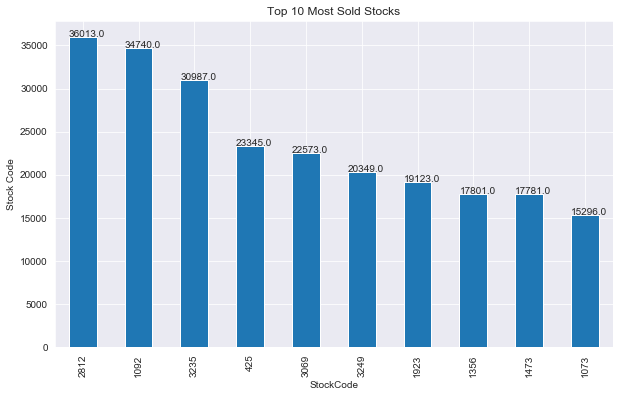

In [11]:
plt.figure(figsize=(10,6))
plt.title("Top 10 Most Sold Stocks")
plt.xlabel("Number Of Stocks Sold")
plt.ylabel("Stock Code")
ax = train.groupby("StockCode").sum()['Quantity'].nlargest(10).plot(kind='bar')

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

In [12]:
train.shape

(284780, 8)

###### Top 10 Expensive Stocks Sold

In [13]:
train['StockCode'] = train['StockCode'].astype("str")

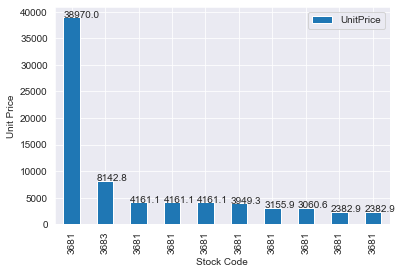

In [14]:
sns.set_style("darkgrid")
ax = train[["StockCode",'UnitPrice']].sort_values('UnitPrice',ascending=False)[:10].plot(kind='bar',x='StockCode',y='UnitPrice')
ax.set_xlabel("Stock Code")
ax.set_ylabel("Unit Price")

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

##### Making a New Feature-- > Total Transaction

In [15]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [16]:
train['Total Transaction'] = train['UnitPrice']*train['Quantity']

In [17]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Transaction
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,19.80


###### Top 10 Customers who spent the most on stocks

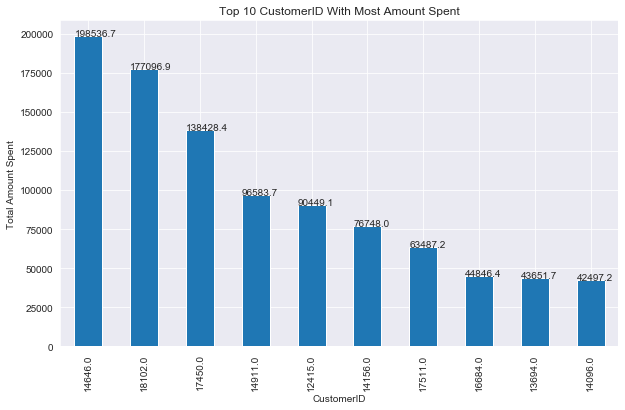

In [18]:
plt.figure(figsize=(10,6))
plt.title("Top 10 CustomerID With Most Amount Spent")
plt.ylabel("Total Amount Spent")
plt.xlabel("Invoice Number")
ax = train.groupby("CustomerID").sum()['Total Transaction'].nlargest(10).plot(kind='bar')
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

###### Top 10 Invoice's Country Which Spends Most Of The Money

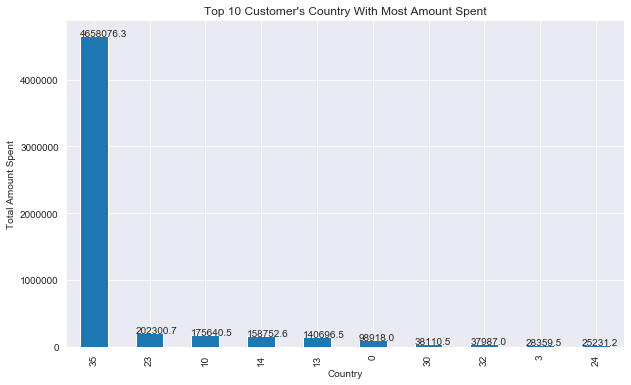

In [19]:
plt.figure(figsize=(10,6))
plt.title("Top 10 Customer's Country With Most Amount Spent")
plt.ylabel("Total Amount Spent")
plt.xlabel("Country Number")
ax = train.groupby("Country").sum()['Total Transaction'].nlargest(10).plot('bar')

for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()),(p.get_x(),p.get_height()))
    
plt.show()

In [20]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Transaction
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,19.80


###### Looking For Outliars

In [21]:
train_copy = train.copy()

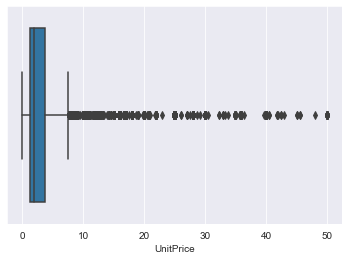

In [22]:
sns.boxplot(train[train['UnitPrice'] < 50]['UnitPrice'])

In [23]:
len(train[train['UnitPrice'] > 15]['UnitPrice'])

2727

In [24]:
train.drop(train[train['UnitPrice'] > 15].index,axis=0,inplace=True)

In [25]:
train['UnitPrice'].mean()

2.7400459629912355

In [26]:
## For Quantity

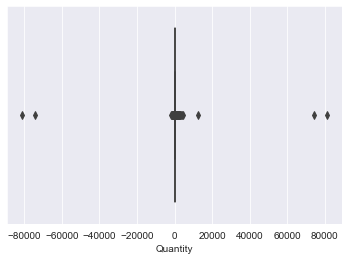

In [27]:
sns.boxplot(train['Quantity'])

In [28]:
train['Quantity'] = np.where(train['Quantity']<0,-train['Quantity'],train['Quantity']) # converting negative values to positive values

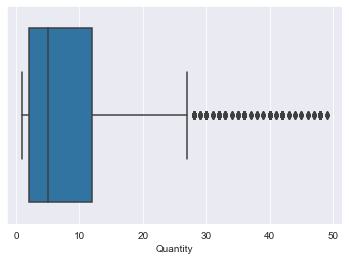

In [29]:
sns.boxplot(train[train['Quantity']< 50]['Quantity'])

In [30]:
print("No of Outliars --- > ",len(train[train['Quantity'] > 50]['Quantity']))

No of Outliars --- >  8319


In [31]:
train.drop(train[train['Quantity'] > 50].index,axis=0,inplace=True)

In [32]:
train['Total Transaction'] = train['Quantity']*train['UnitPrice']

###### Feature Engineering

In [33]:
def filter_datetime_data(train,feature):
    global Year,Month,Day,Hour,Mins,Sec
    Year = []
    Month = []
    Day = []
    Hour = []
    Mins = []
    Sec = []

    for data in train[feature]:
        data = data.split(" ")  #splitting data to date and time
        date = data[0].split("-") #splitting date to year,month,day
        Year.append(date[0]) # appending to year
        Month.append(date[1]) # appending to month
        Day.append(date[2]) # appending to day
        
        time = data[1].split(":") # splitting time to hour,mins,sec
        Hour.append(time[0]) # appending hour
        Mins.append(time[1]) # appending mins
        Sec.append(time[2]) # appending to seconds
        

In [34]:
#For Train data
filter_datetime_data(train,'InvoiceDate')

In [35]:
labels = ['Year',"Month","Day","Hour","Mins","Sec"] # labels are column name
data = [Year,Month,Day,Hour,Mins,Sec]  # list with list of data
k = 0 # iterator

for label in labels:
    train[label] = data[k]
    train[label] = train[label].astype('int64') # convert string data to int
    k+=1

In [36]:
del train['InvoiceDate']

In [37]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total Transaction,Year,Month,Day,Hour,Mins,Sec
0,6141,1583,144,3,3.75,14056.0,35,11.25,2011,5,6,16,54,0
1,6349,1300,3682,6,1.95,13098.0,35,11.70,2011,5,11,7,35,0
2,16783,2178,1939,4,5.95,15044.0,35,23.80,2011,11,20,13,20,0
3,16971,2115,2983,1,0.83,15525.0,35,0.83,2011,11,22,12,7,0
4,6080,1210,2886,12,1.65,13952.0,35,19.80,2011,5,6,9,0,0


In [38]:
for label in labels:
    print('\n\n',label,' --- \n',train[label].unique())



 Year  --- 
 [2011 2010]


 Month  --- 
 [ 5 11 12  6  3  4  2  1  9  7 10  8]


 Day  --- 
 [ 6 11 20 22 27  8 23  4  7  5  3 26 12 19 16 13 31 21 25 15 30  1 10  9
 14 18 28 24 17  2 29]


 Hour  --- 
 [16  7 13 12  9 20 14 10  8 15 17 11 19 18  6]


 Mins  --- 
 [54 35 20  7  0 52  1 40 11  6 45 41 17 33 12 51 15  5 58 34 46  4  8 47
 48 19 42 39 38 28 29 49 36 18 13 27 31 25 23  3 37 53 56 14 30 10 44 26
 24 50 59  9 43 55 32 16 57 22 21  2]


 Sec  --- 
 [0]


In [39]:
# as sec is full of 0s lets drop it

In [40]:
#for train
del train['Sec']

In [41]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Total Transaction,Year,Month,Day,Hour,Mins
0,6141,1583,144,3,3.75,14056.0,35,11.25,2011,5,6,16,54
1,6349,1300,3682,6,1.95,13098.0,35,11.70,2011,5,11,7,35
2,16783,2178,1939,4,5.95,15044.0,35,23.80,2011,11,20,13,20
3,16971,2115,2983,1,0.83,15525.0,35,0.83,2011,11,22,12,7
4,6080,1210,2886,12,1.65,13952.0,35,19.80,2011,5,6,9,0


In [42]:
del train['Total Transaction']

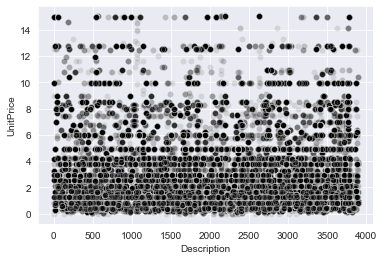

In [43]:
sns.set_style("darkgrid")
sns.scatterplot(train['Description'],train['UnitPrice'],alpha=0.1,color='black')

###### Removing All the unique IDs

In [44]:
del train['InvoiceNo']
del train["CustomerID"]

In [45]:
final_train = train

In [46]:
del train['StockCode']

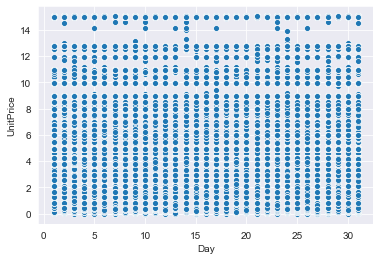

In [47]:
sns.scatterplot(final_train['Day'],final_train['UnitPrice'])

###### Corelation

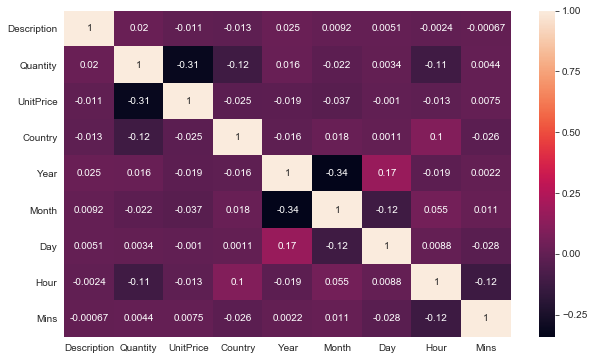

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(final_train.corr(),annot=True)
plt.show()

### Modelling

In [49]:
Y = train['UnitPrice']
X = train.drop(columns=['UnitPrice'],inplace=False,axis=1)

###### XGboost

In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=69)

In [52]:
xgb_model = xgb.XGBRegressor()

In [53]:
xgb_model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [54]:
xgb_model.score(X_test,Y_test)

0.8216466773825533

In [55]:
xgb_model.score(X_train,Y_train)

0.8250839946965622

In [56]:
pred = xgb_model.predict(X_test)

In [57]:
sample = pd.DataFrame({"REAL":Y_test,"PRED":pred,"RES":Y_test-pred})

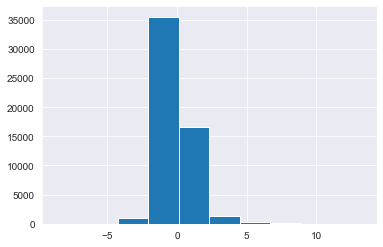

In [58]:
sample['RES'].hist()

In [112]:
print("MSE -- > ",mean_squared_error(Y_test,pred))
print("RMSE -- > ",np.sqrt(mean_squared_error(Y_test,pred)))
print("R^2  -- > ",r2_score(Y_test,pred))
print(" \n\nMODELS FIT ON TRAINING DATA -- > ",xgb_model.score(X_train,Y_train))
print("MODELS FIT ON TESTING DATA -- > ",xgb_model.score(X_test,Y_test))

MSE -- >  1.195205032091044
RMSE -- >  1.0932543309271836
R^2  -- >  0.8216466773825531
 

MODELS FIT ON TRAINING DATA -- >  0.8250839946965622
MODELS FIT ON TESTING DATA -- >  0.8216466773825533


##### RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [60]:
rfr = RandomForestRegressor()

In [61]:
rfr.fit(X_train,Y_train)

C:\Users\paddy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:
rfr.score(X_test,Y_test)

0.8753342170951509

In [63]:
rfr.score(X_train,Y_train) # Overfit (Tried Tuning Hyper-parameters but results in underfitting)

0.9774886004338125

In [64]:
pred1 = rfr.predict(X_test)

In [65]:
sample = pd.DataFrame({"REAL":Y_test,"PRED":pred1,"RES":Y_test-pred1})

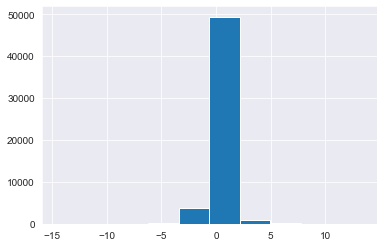

In [66]:
sample['RES'].hist()

In [67]:
mean_squared_error(Y_test,pred1)

0.8354269428276385

###### Using Descison Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
dt = DecisionTreeRegressor(max_depth=20)

In [70]:
dt.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [71]:
dt.score(X_test,Y_test)

0.7890843004923839

In [72]:
dt.score(X_train,Y_train)

0.9347334778159139

In [73]:
pred_tree = dt.predict(X_test)

In [74]:
eval_df = pd.DataFrame({"REAL":Y_test,"PRED":pred_tree,"RES":Y_test-pred_tree})

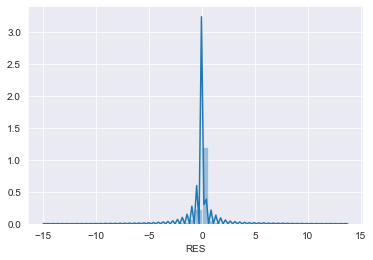

In [75]:
sns.distplot(eval_df['RES'])
eval_df['RES'].hist()

In [111]:
print("MSE -- > ",mean_squared_error(Y_test,pred_tree))
print("RMSE -- > ",np.sqrt(mean_squared_error(Y_test,pred_tree)))
print("R^2  -- > ",r2_score(Y_test,pred_tree))
print(" \n\nMODELS FIT ON TRAINING DATA -- > ",dt.score(X_train,Y_train))
print("MODELS FIT ON TESTING DATA -- > ",dt.score(X_test,Y_test))

MSE -- >  1.4134163675728788
RMSE -- >  1.1888718886292495
R^2  -- >  0.7890843004923838
 

MODELS FIT ON TRAINING DATA -- >  0.9347334778159139
MODELS FIT ON TESTING DATA -- >  0.7890843004923839


##### Why I Chose Max Depth as 20 ?

In [94]:
RMSE = []
MSE = []
R2_test = []
R2_train = []

for i in range(5,31):
    dt_ = DecisionTreeRegressor(max_depth=i)
    dt_.fit(X_train,Y_train)
    predicted = dt_.predict(X_test)
    MSE.append(mean_squared_error(Y_test,predicted))
    RMSE.append(np.sqrt(mean_squared_error(Y_test,predicted)))
    R2_train.append(dt_.score(X_train,Y_train))
    R2_test.append(dt_.score(X_test,Y_test))
    del dt_

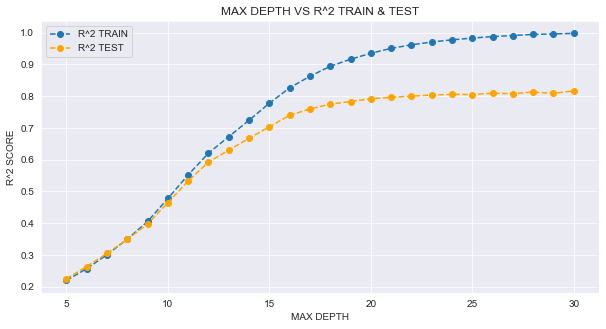

In [105]:
ind = [int(i) for i in range(5,31)]

plt.figure(figsize=(10,5))
plt.title("MAX DEPTH VS R^2 TRAIN & TEST")
plt.xlabel("MAX DEPTH")
plt.ylabel("R^2 SCORE")
plt.plot(ind,R2_train,marker='o',linestyle='dashed')
plt.plot(ind,R2_test,color='orange',marker='o',linestyle='dashed')

plt.legend(['R^2 TRAIN',"R^2 TEST"])
plt.show()

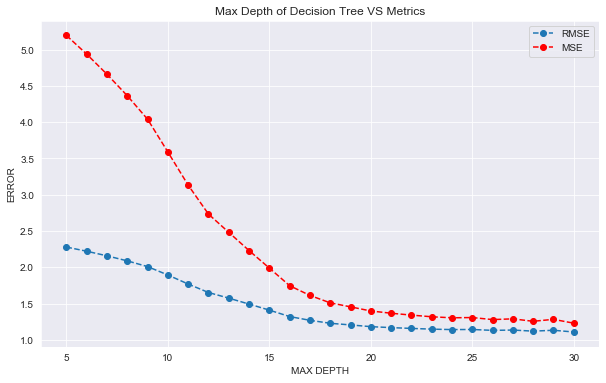

In [104]:
plt.figure(figsize=(10,6))
plt.title("Max Depth of Decision Tree VS Metrics")
plt.xlabel("MAX DEPTH")
plt.ylabel("ERROR")
plt.plot(ind,RMSE,marker='o',linestyle='dashed')
plt.plot(ind,MSE,color='r',marker='o',linestyle='dashed')
plt.legend(['RMSE','MSE'])
plt.show()

###### Final Comparision of XGboost and Decision Tree

In [116]:
print("Model -- > XGboost -- \n")
print("MSE -- > ",mean_squared_error(Y_test,pred))
print("RMSE -- > ",np.sqrt(mean_squared_error(Y_test,pred)))
print("R^2  -- > ",r2_score(Y_test,pred))
print("MODELS FIT ON TRAINING DATA -- > ",xgb_model.score(X_train,Y_train))
print("MODELS FIT ON TESTING DATA -- > ",xgb_model.score(X_test,Y_test))

print("\n\nModel -- > Decision Tree Regressor \n")
print("MSE -- > ",mean_squared_error(Y_test,pred_tree))
print("RMSE -- > ",np.sqrt(mean_squared_error(Y_test,pred_tree)))
print("R^2  -- > ",r2_score(Y_test,pred_tree))
print("MODELS FIT ON TRAINING DATA -- > ",dt.score(X_train,Y_train))
print("MODELS FIT ON TESTING DATA -- > ",dt.score(X_test,Y_test))

Model -- > XGboost -- 

MSE -- >  1.195205032091044
RMSE -- >  1.0932543309271836
R^2  -- >  0.8216466773825531
MODELS FIT ON TRAINING DATA -- >  0.8250839946965622
MODELS FIT ON TESTING DATA -- >  0.8216466773825533


Model -- > Decision Tree Regressor 

MSE -- >  1.4134163675728788
RMSE -- >  1.1888718886292495
R^2  -- >  0.7890843004923838
MODELS FIT ON TRAINING DATA -- >  0.9347334778159139
MODELS FIT ON TESTING DATA -- >  0.7890843004923839
